# Clifford Attractors

### (Truth is, I hadn't touched any R code for 2 years. This was my excuse to re-install a couple of packages & get started.)

* Credit: [fronkonstin.com](https://fronkonstin.com/2017/11/07/drawing-10-million-points-with-ggplot-clifford-attractors)

* Given four parameters (a,b,c,d) and a starting point (x0, y0), the  equation defines a point location at step n, which is defined just by its location at n-1; an attractor can be thought as the trajectory described by a particle. 
* This plot shows the evolution of a particle starting at (x0, y0)=(0, 0) with parameters a=-1.24458046630025, b=-1.25191834103316, c=-1.81590817030519 and d=-1.90866735205054 along 10 million of steps.

In [ ]:
library(Rcpp)
library(ggplot2)
library(dplyr)

In [2]:
opt = theme(legend.position  = "none",
            panel.background = element_rect(fill="white"),
            axis.ticks       = element_blank(),
            panel.grid       = element_blank(),
            axis.title       = element_blank(),
            axis.text        = element_blank())

In [3]:
cppFunction('DataFrame createTrajectory(int n, double x0, double y0, 
            double a, double b, double c, double d) {
            // create the columns
            NumericVector x(n);
            NumericVector y(n);
            x[0]=x0;
            y[0]=y0;
            for(int i = 1; i < n; ++i) {
            x[i] = sin(a*y[i-1])+c*cos(a*x[i-1]);
            y[i] = sin(b*x[i-1])+d*cos(b*y[i-1]);
            }
            // return a new data frame
            return DataFrame::create(_["x"]= x, _["y"]= y);
            }
            ')

In [4]:
a=-1.24458046630025
b=-1.25191834103316 
c=-1.81590817030519 
d=-1.90866735205054

In [5]:
df=createTrajectory(10000000, 0, 0, a, b, c, d)
 
png("Clifford.png", units="px", width=1600, height=1600, res=300)
ggplot(df, aes(x, y)) + geom_point(color="black", shape=46, alpha=.01) + opt
dev.off()

png 
  2

In [7]:
library('IRdisplay')

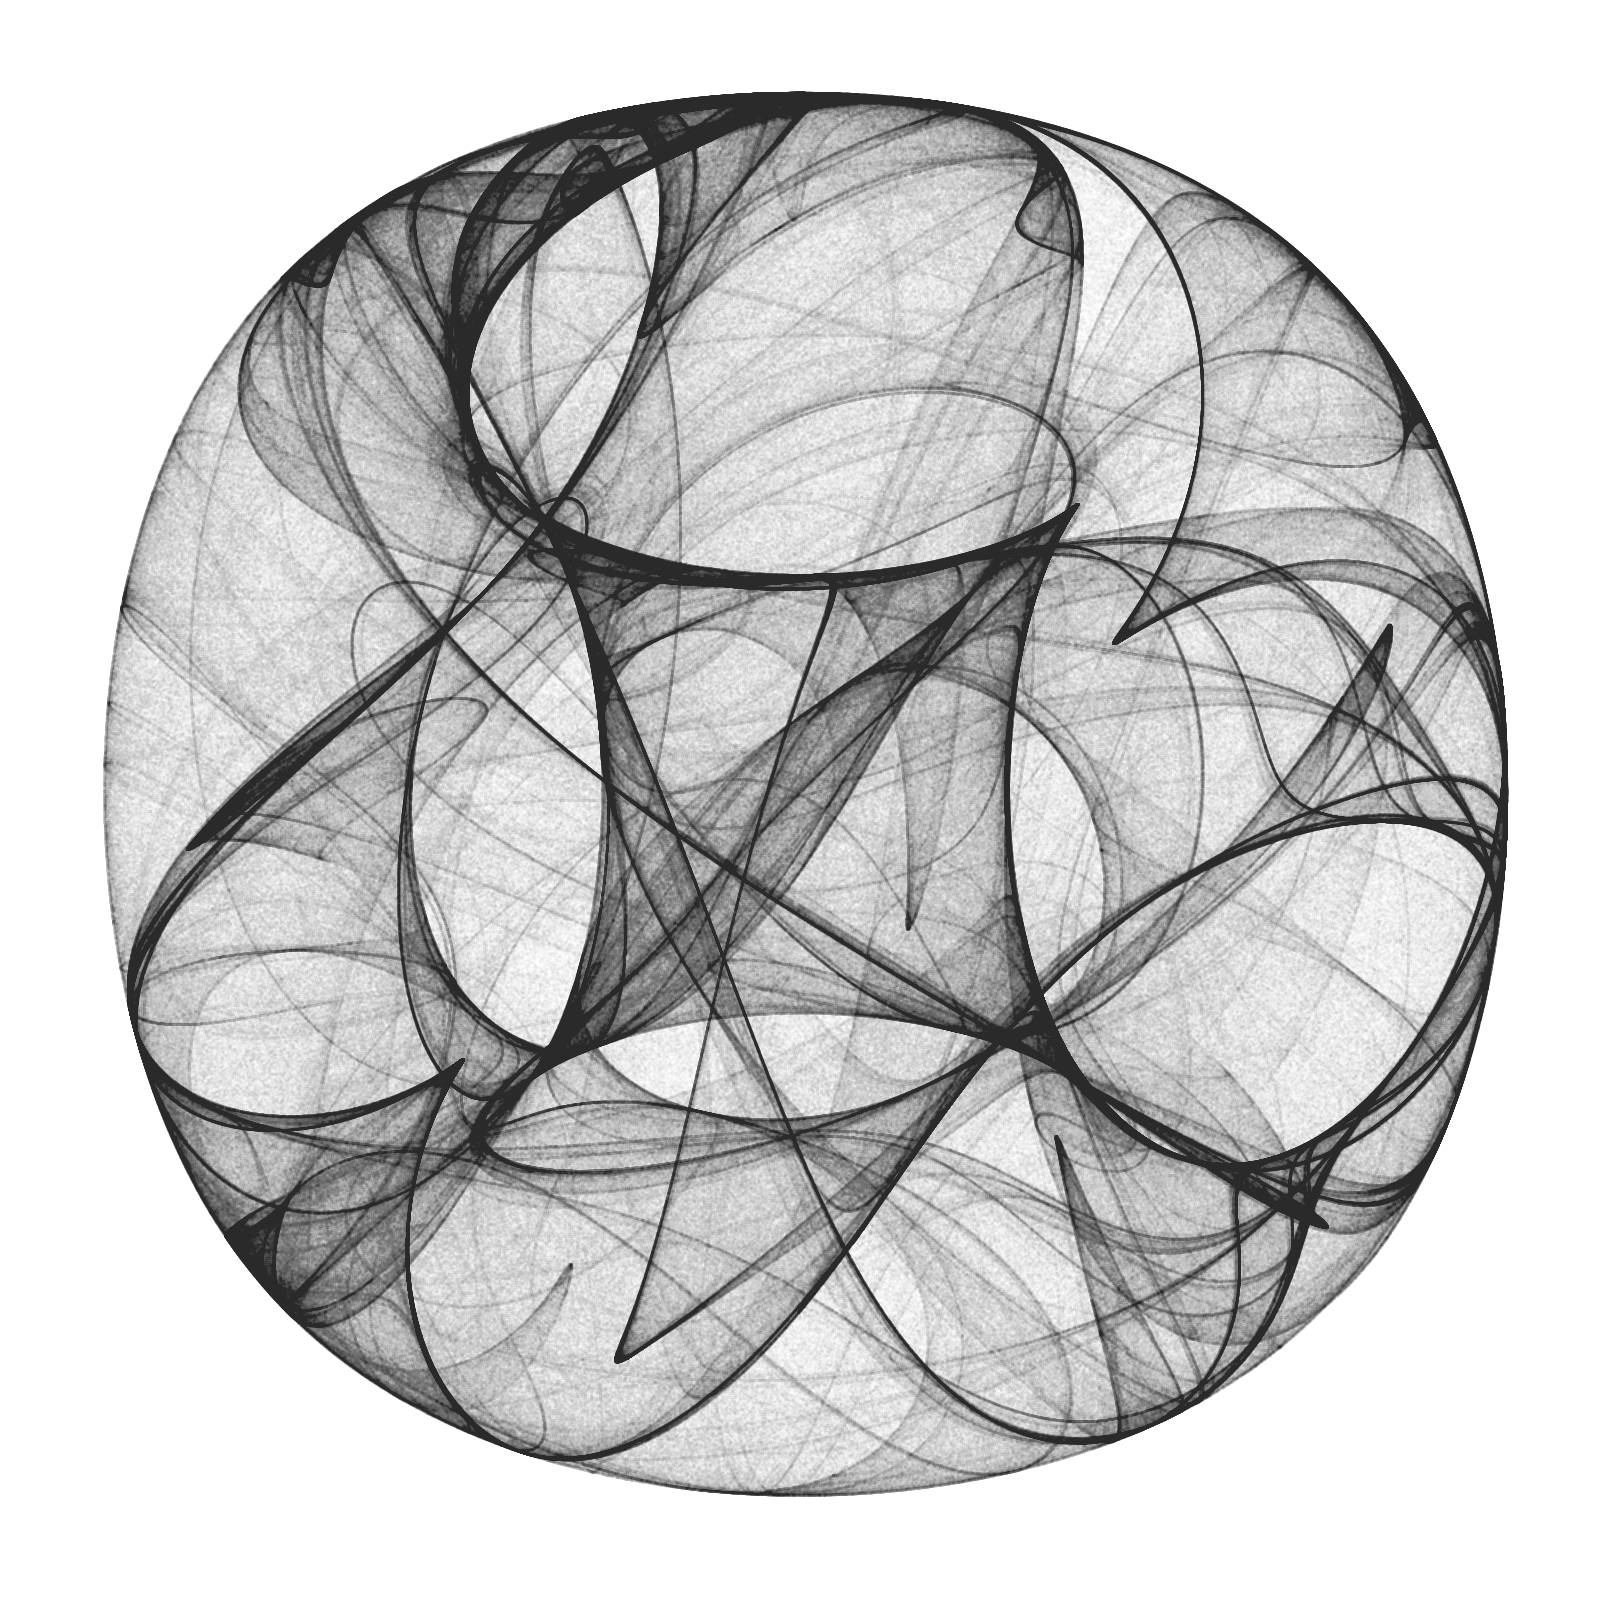

In [8]:
display_png(file="Clifford.png")